## Exploratory Data Analysis

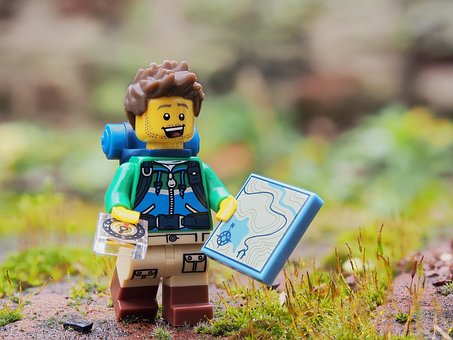

### Summary of the Results from the Analysis in this Workbook:

The dataset consists of data from all 308 Municipalities in Portugal. A special emphasis was given to the target variable __Unemployment Rate__. The mean value is _12.1%_ and ranges from a minimum of _5.1%_ in Oleiros to _22.9%_ in Mourão. The data seems to be normally distributed. </p>
<p> </p>

Of course it needs to be acknowledged, that the economic centers Lisboa and Porto contribute a lot more to the overall shape of the data, thatn smaller municiaplities. Nevertheless, it was waived to include the absolute figures of population to ensure comparability. For the variables __enterprise density__ and __population density__ these differences are huge and underline the special status of these two cities. 

<p> </p><p> </p>


Category | Observations
------------ | -------------
Unemployment Shares Age Group | Use only 45-54, it seems to fit best. Least outliers and high correlations to other variables.
Unemployment Shares Education Females | Higher_female (higher Education) is the variable to choose, least outliers. Everything is highly correlated.
Unemployment Shares Education Males | no_Male (No Education for male) is chosen to maintain some variety in the data.
Unemployment Shares Type | These variables reveal no insides. They seem very irrelevant.
Average Wages | Average Wage in all categories seem also to have only very few explanatory power. Furthermore there are 22 values missing. These are imputed with the mean.
Municipal Finance | There are some outliers. Especially Corvo has an extreme capital revenue and expenditure per capita. they exceed the mean by factor 13. Hence these values are replaced with the second highest.
Population & enterprise density | These are highly correlated and only population is to be kept.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_pickle("./raw.pkl")

The data consists of 308 instances, which correspond to all portuguese municipalities. In total there are 67 featues extracted of which "Unemployment_Rate" represents the target variable.

In [78]:
df.shape

(308, 67)

In [79]:
# bin the target variable
df["unemp_categ"] = pd.cut(df['Unemployment_Rate'], 3)

In [80]:
df.loc[:,"Unemployment_Rate"].sort_values().head()

Municipality
Oleiros             5.1
Lajes das Flores    5.3
Calheta [R.A.A.]    6.2
Corvo               6.3
Madalena            6.5
Name: Unemployment_Rate, dtype: float64

In [81]:
df.loc[:,"Unemployment_Rate"].sort_values(ascending=False).head()

Municipality
Mourão                        22.9
Ponte de Sor                  20.9
Serpa                         20.5
Cinfães                       20.0
Vila Real de Santo António    19.9
Name: Unemployment_Rate, dtype: float64

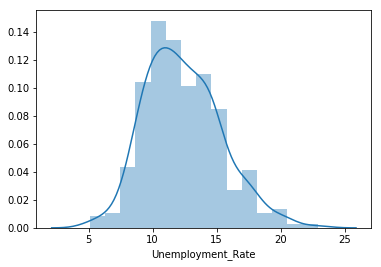

In [82]:
sns.distplot(df["Unemployment_Rate"])

In [83]:
df["Unemployment_Rate"].describe()

count    308.000000
mean      12.387013
std        2.950718
min        5.100000
25%       10.100000
50%       12.100000
75%       14.300000
max       22.900000
Name: Unemployment_Rate, dtype: float64

In [84]:
df.describe()

,Unemployment_Rate,unemp_15 - 24,unemp_25 - 34,unemp_35 - 44,unemp_45 - 54,unemp_55 - 64,unemp_65 or more,no_female,first_female,second_female,...,Young-age dependency ratio,enterprises density,labour productivity,BE,CDS-PP,PCP-PEV,PPD/PSD,PS,x,y
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,12.387013,0.196361,0.250591,0.220318,0.208447,0.123914,0.000369,0.011667,0.186021,0.122125,...,21.528896,32.577273,16150.051948,4.375000,11.191883,8.044805,43.069481,28.955844,39.615116,-9.638810
std,2.950718,0.039439,0.036287,0.028334,0.032555,0.038473,0.000798,0.010285,0.056831,0.038428,...,2.965300,106.823062,9462.612133,2.061606,3.325388,8.402214,11.603742,6.805636,1.816245,4.918027
min,5.100000,0.101660,0.167015,0.062500,0.104396,0.000000,0.000000,0.000000,0.064103,0.000000,...,12.900000,0.500000,5318.400000,0.500000,3.900000,1.000000,13.800000,5.800000,32.661089,-31.178197
25%,10.100000,0.172317,0.229067,0.204391,0.191375,0.106056,0.000000,0.005812,0.148128,0.093725,...,19.500000,2.675000,11708.450000,2.700000,8.900000,2.600000,35.300000,24.900000,38.718052,-8.750589
50%,12.100000,0.190419,0.246430,0.222890,0.208255,0.125243,0.000000,0.010094,0.173586,0.113485,...,21.400000,6.450000,13877.400000,4.100000,10.900000,4.350000,44.600000,29.200000,39.815294,-8.291156
75%,14.300000,0.210753,0.269430,0.238294,0.227135,0.143650,0.000454,0.015234,0.212984,0.147403,...,23.400000,17.225000,18200.325000,5.900000,13.400000,9.800000,51.425000,32.925000,41.009755,-7.739707
max,22.900000,0.360334,0.500000,0.290698,0.324711,0.318681,0.006270,0.094737,0.426856,0.252577,...,34.200000,1143.400000,119614.500000,10.300000,23.800000,44.600000,68.300000,52.100000,42.114454,-6.271231


### Analysis of "Unemployment Shares per Age Group"

The data consists of shares of unemployed people. Meaning if a municipality has 12.3 in unemp_15 - 24 it means, that of the unemployed people 12.3% are in an age range between 15 and 24. 

In [85]:
unemp_data = ["Unemployment_Rate","unemp_15 - 24" ,"unemp_25 - 34" ,"unemp_35 - 44" ,"unemp_45 - 54" ,"unemp_55 - 64" ,"unemp_65 or more"]
unemp_categ = ["unemp_categ","unemp_15 - 24" ,"unemp_25 - 34" ,"unemp_35 - 44" ,"unemp_45 - 54" ,"unemp_55 - 64" ,"unemp_65 or more"]

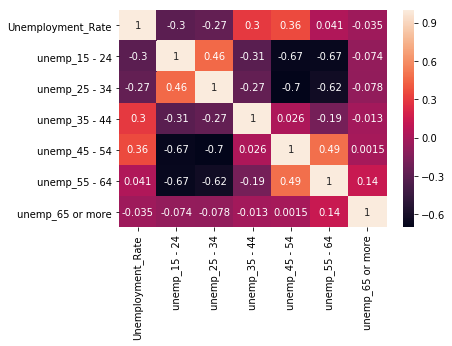

In [86]:
sns.heatmap(df.loc[:, unemp_data].corr(), annot=True)

All variables are highly correlated to each other. This is expected and makes only sense. For the ML ground data, we'll just select one variable of this chunk. Since 45-54 seems to have the highest correlation and the most explanatory power (based on gut feeling) we'll chose this one.

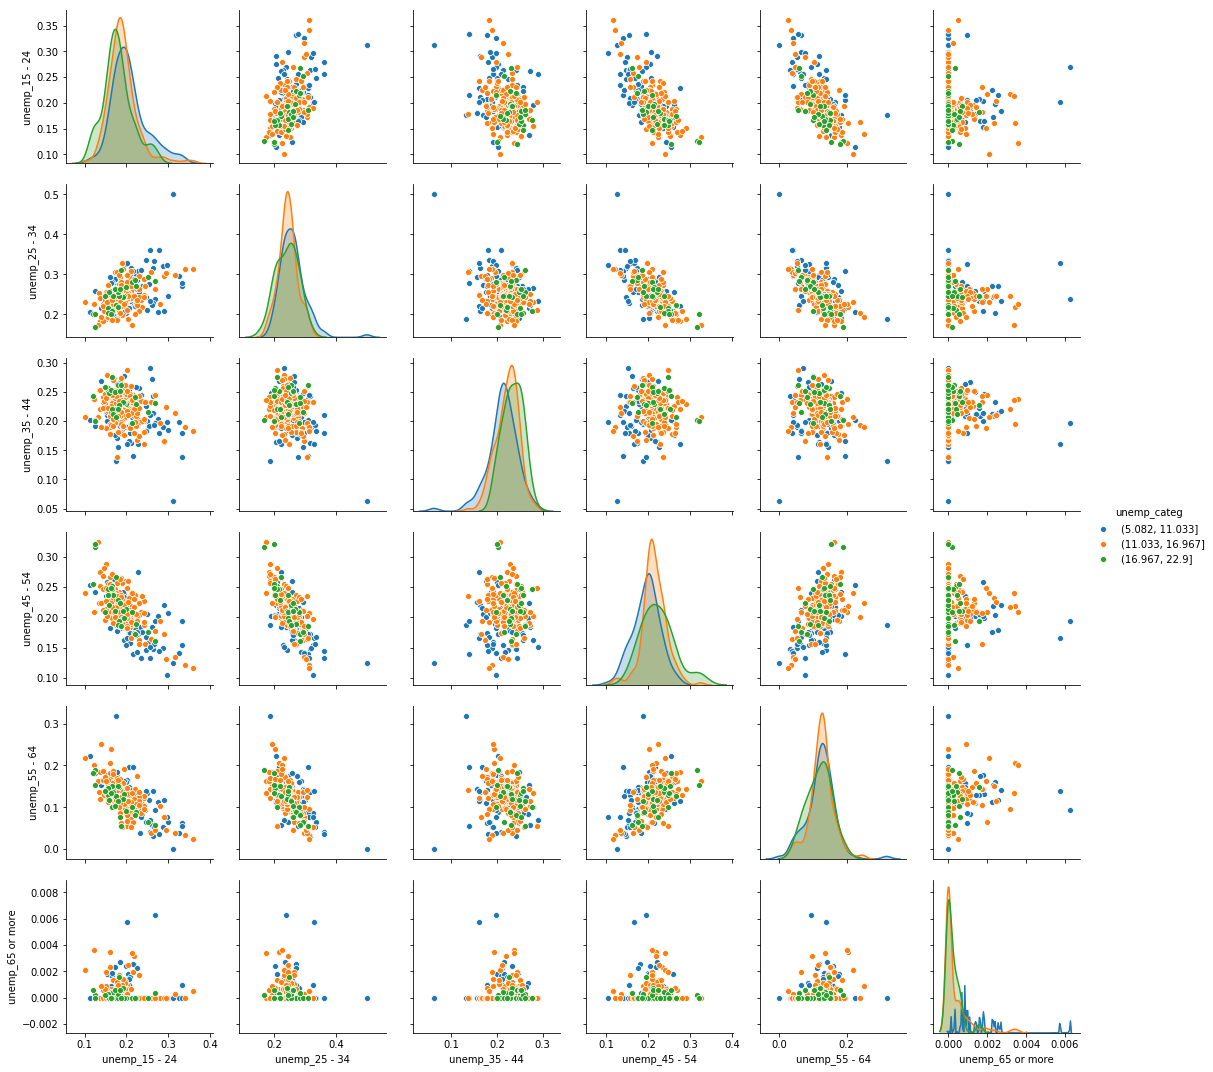

In [87]:
sns.pairplot(df.loc[:, unemp_categ], hue="unemp_categ")

### Analysis of "Unemployment Shares per Education Degree" for females

These variables explain the share of education degrees for unemployed female people.

In [88]:
edu_female = ['Unemployment_Rate', 'no_female','first_female', 'second_female', 'third_female', 'upper_female',
               'middle_female', 'higher_female']
edu_female_categ = ['unemp_categ', 'no_female','first_female', 'second_female', 'third_female', 'upper_female',
               'middle_female', 'higher_female']

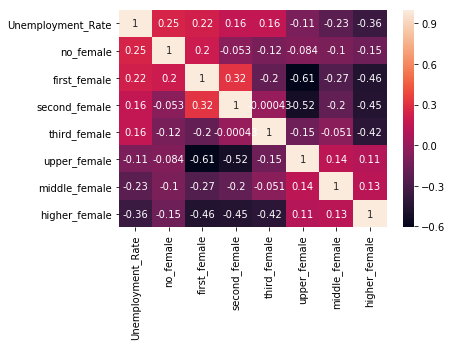

In [89]:
sns.heatmap(df.loc[:, edu_female].corr(), annot=True)

Same reasoning as above mentioned, we'll chose higher_female.
The following pairgrid also suggests, that higher_female is the only varibale which reveal a slight tendency in the sense, that the higher the share of unemployed females with superior education yield a lower unemployment rate.

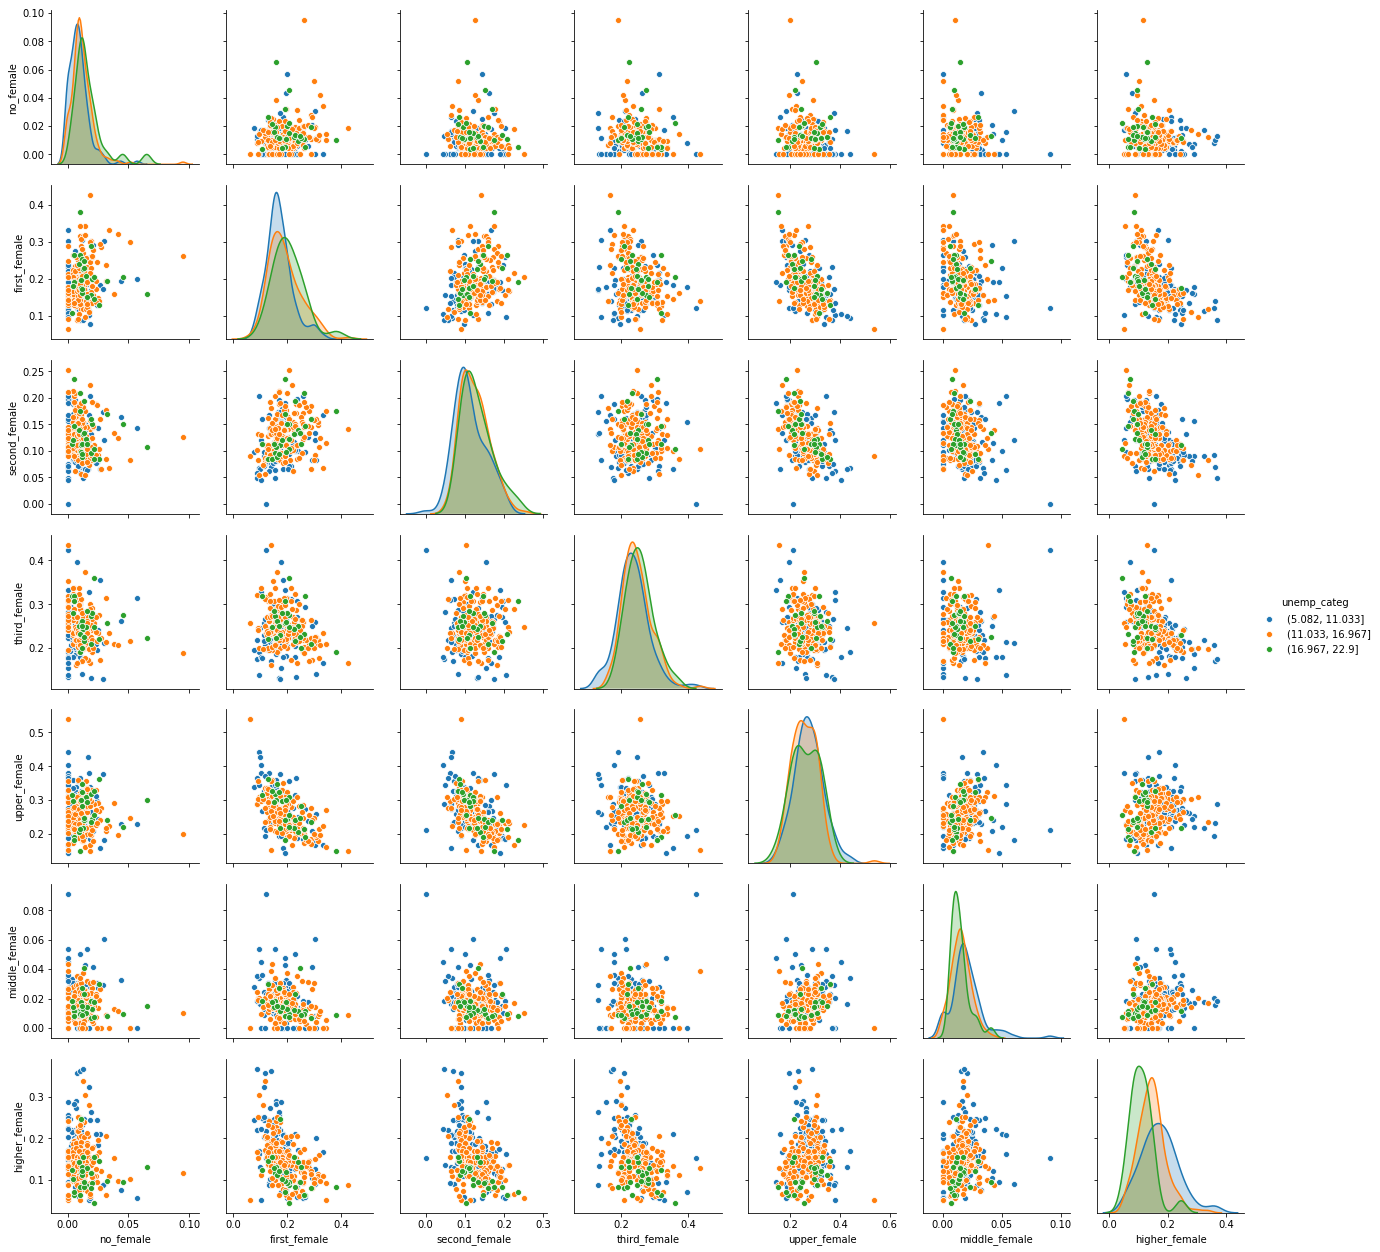

In [90]:
sns.pairplot(df.loc[:, edu_female_categ], hue="unemp_categ")

### Analysis of "Unemployment Shares per Education Degree" for males

These variables explain the share of education degrees for unemployed male people.

In [91]:
edu_male = ['Unemployment_Rate', 'no_male', 'first_male',
       'second_male', 'third_male', 'upper_male', 'middle_male', 'higher_male']
edu_male_categ = ['unemp_categ', 'no_male', 'first_male',
       'second_male', 'third_male', 'upper_male', 'middle_male', 'higher_male']

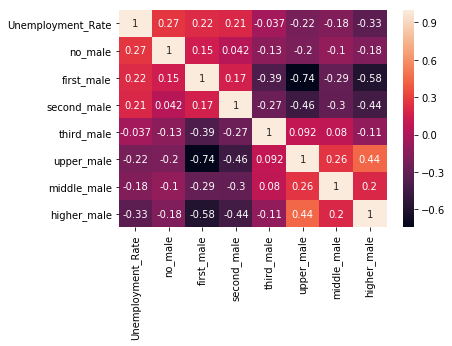

In [92]:
sns.heatmap(df.loc[:, edu_male].corr(), annot=True)

To maintain some variety in the data, we'll choose no_male. The share of unemployed male people, who do not have an education degree.

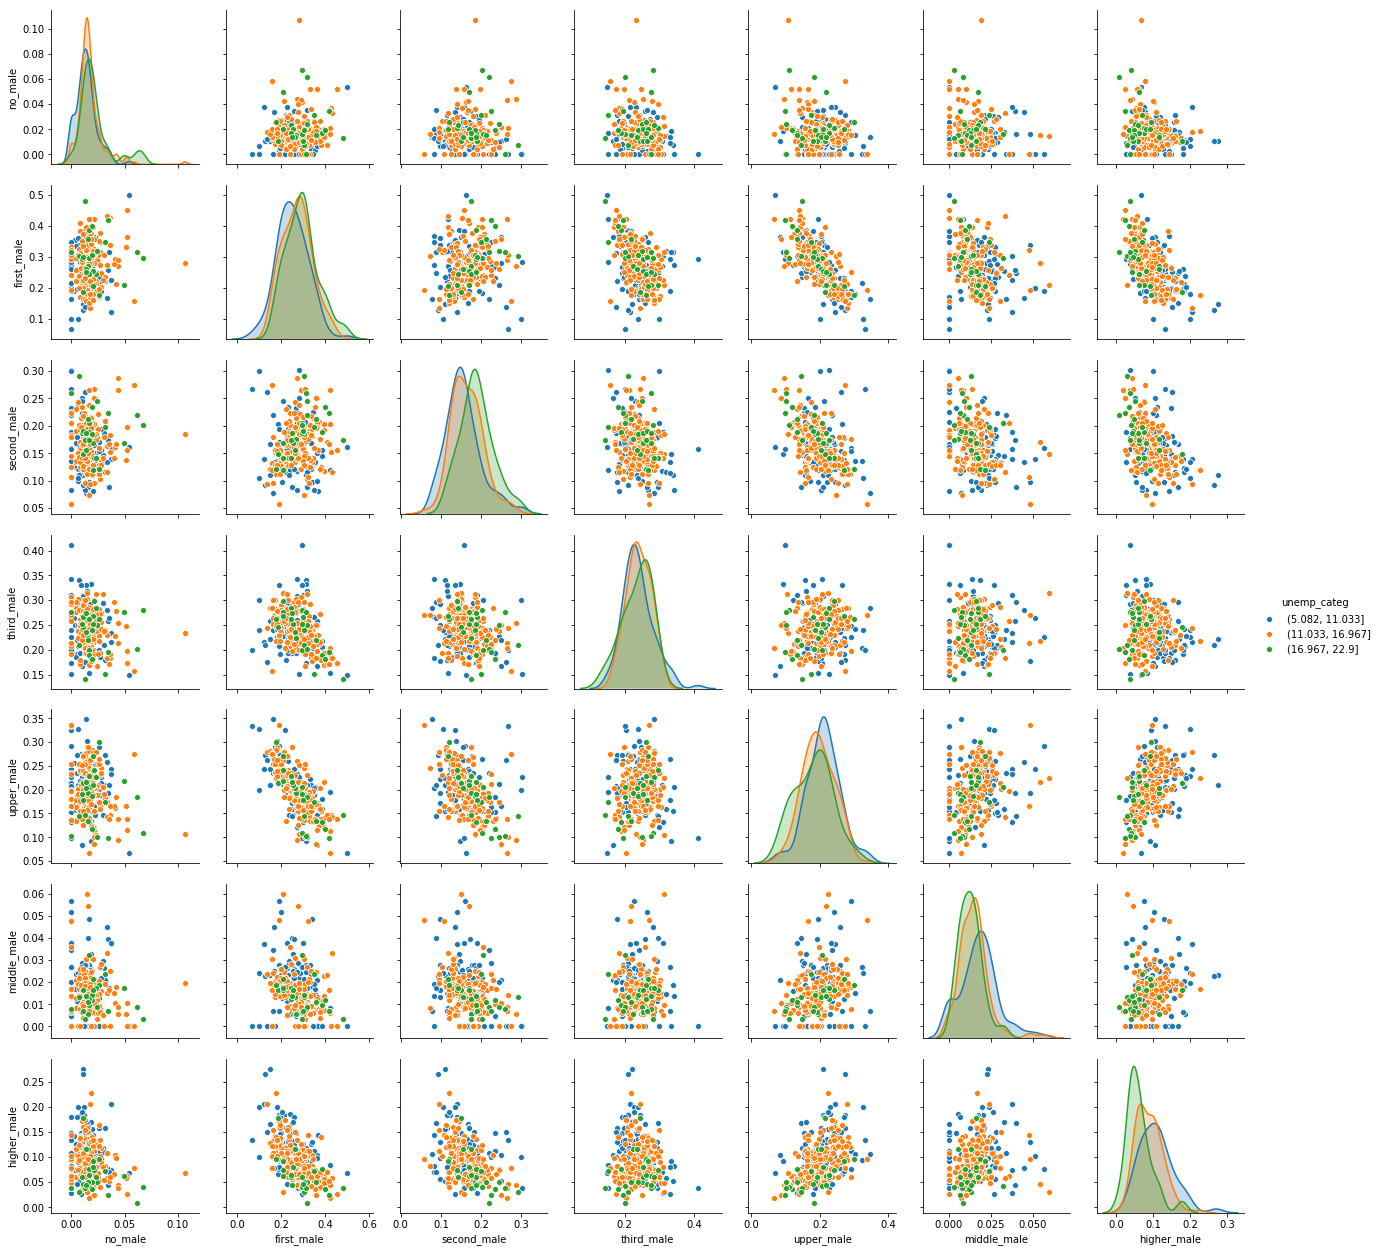

In [93]:
sns.pairplot(df.loc[:, edu_male_categ], hue="unemp_categ")

### Analysis of "Unemployment Shares per Type"

These variables explain the share of the unemployment type for females. Saying if it is the first job hunt or the seek for a new job.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


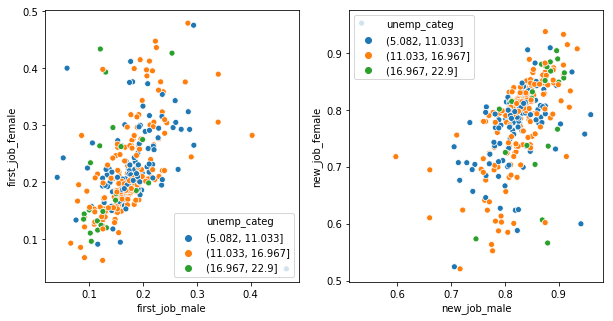

In [94]:
fig, ax =plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x="first_job_male", y='first_job_female', data=df, hue='unemp_categ', ax=ax[0])
sns.scatterplot(x="new_job_male", y='new_job_female', data=df, hue='unemp_categ', ax=ax[1])
fig.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


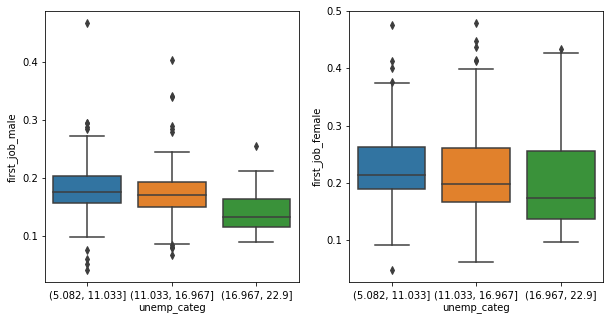

In [95]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x="unemp_categ",y="first_job_male",data=df, ax=ax[0])
sns.boxplot(x="unemp_categ",y="first_job_female",data=df, ax=ax[1])
fig.show()

These variables seem to be absolutely irrelevant. There's no distinction possible. Remove them.

### Analysis of Average Wage per Education 

These variables show the average wage per education of a municiaplity population.

In [96]:
edu = ['Unemployment_Rate', 'Less 1st cycle', '1st cycle', '2nd cycle', '3rd cycle',
       'upper', 'Higher']
edu_categ = ['unemp_categ', 'Less 1st cycle', '1st cycle', '2nd cycle', '3rd cycle',
       'upper', 'Higher']

In [97]:
# renameing for graphical purposes
df = df.rename(index=str, columns={"Upper-secondary and post-secondary non-tertiary": "upper"})

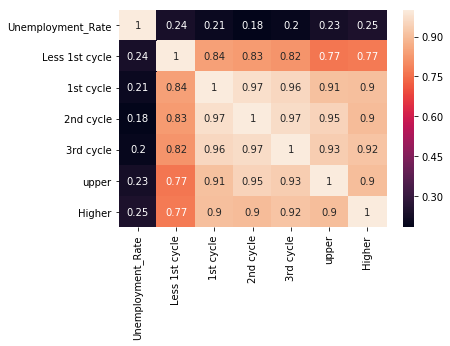

In [98]:
sns.heatmap(df.loc[:, edu].corr(), annot=True)

All of it is very correlated to the target variable. This seems a bit odd. Also there are 24 missing values, which correspond to 7.8% of all the data. Imputing doesn't make sense, hence the data should be dropped.

In [99]:
df.loc[df["Less 1st cycle"]<100, edu].count()[0]/df.shape[0]

0.07792207792207792

### Analysis of Average Wage per Position + the overall avg Wage

These variables show the average wage per position of a municiaplity population.

In [100]:
wage_ = ['Unemployment_Rate', 'Senior Officials', 'Middle-Level Personnel',
       'Supervisors, Foremen and Team Leaders', 'Highly-skilled workers',
       'Skilled workers', 'Semi-skilled workers', 'Unskilled workers',
       'Understudies and apprentices', 'avg_wage']
wage_categ = ['unemp_categ','Senior Officials', 'Middle-Level Personnel',
       'Supervisors, Foremen and Team Leaders', 'Highly-skilled workers',
       'Skilled workers', 'Semi-skilled workers', 'Unskilled workers',
       'Understudies and apprentices', 'avg_wage']

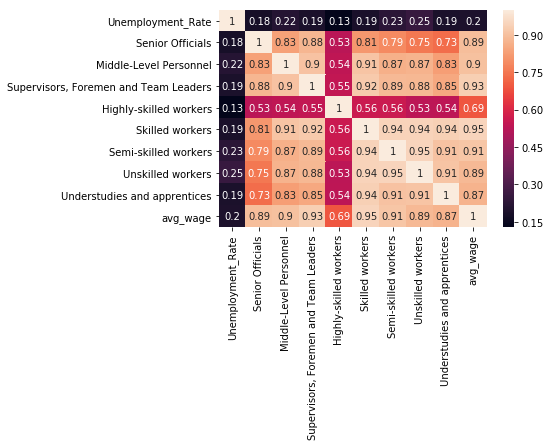

In [101]:
sns.heatmap(df.loc[:, wage_].corr(), annot=True)

In [102]:
df.loc[:, wage_categ].describe()

,Senior Officials,Middle-Level Personnel,"Supervisors, Foremen and Team Leaders",Highly-skilled workers,Skilled workers,Semi-skilled workers,Unskilled workers,Understudies and apprentices,avg_wage
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1558.114935,1358.721429,1144.802273,1109.587662,768.854221,632.080844,584.792208,579.414610,824.814286
std,621.396476,439.222784,370.877678,558.226995,220.751580,176.875289,158.733047,161.606959,261.662455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1269.675000,1238.025000,1023.850000,1020.925000,742.275000,618.525000,582.575000,575.450000,761.300000
50%,1531.450000,1407.550000,1186.350000,1107.850000,799.750000,655.850000,612.650000,602.550000,829.050000
75%,1895.625000,1565.200000,1339.250000,1208.600000,863.025000,707.550000,646.450000,633.975000,929.475000
max,3594.500000,2860.300000,2257.100000,8662.500000,1582.300000,1275.800000,832.400000,1235.700000,1721.200000


In [103]:
wage_sector_ = ['Unemployment_Rate', 'Agriculture, farming of animals, hunting, agroforestry and fishing',
       'Industry, construction, energy and water', 'Manufacturing',
       'Construction']
wage_sector_categ = ['unemp_categ','Agriculture, farming of animals, hunting, agroforestry and fishing',
       'Industry, construction, energy and water', 'Manufacturing',
       'Construction']

### Analysis of Municipality Financial Structures

These variables show current revenue, the capital revenue and the respective expenditures.

In [104]:
fin = ['Unemployment_Rate','Current revenue', 'Capital revenue',
       'Current expenditure', 'Capital expenditure']
fin_categ = ['unemp_categ','Current revenue', 'Capital revenue',
       'Current expenditure', 'Capital expenditure']

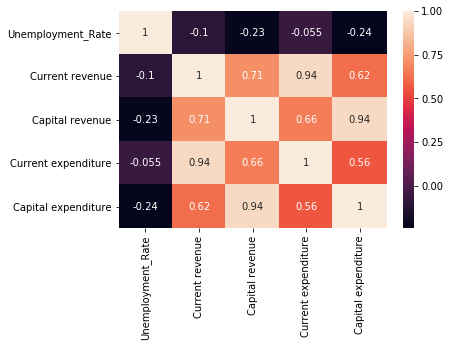

In [105]:
sns.heatmap(df.loc[:, fin].corr(), annot=True)

The revenue and expenditure of Corvo is outstanding. This can be considered as an outlier. As The value exceeds the mean by the factor of 13.

In [106]:
df.loc[df["Current revenue"]>1500,fin]

,Unemployment_Rate,Current revenue,Capital revenue,Current expenditure,Capital expenditure
Municipality,,,,,
Pampilhosa da Serra,9.5,1610.22,1307.45,1480.64,1228.17
Alcoutim,8.8,1763.20,1571.31,1792.33,1210.41
Corvo,6.3,2305.17,5310.67,2031.36,5230.11


In [107]:
df.loc[:,fin].describe()

,Unemployment_Rate,Current revenue,Capital revenue,Current expenditure,Capital expenditure
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,12.387013,687.318344,368.530682,677.203149,355.882078
std,2.950718,285.685065,387.150310,321.067811,365.277088
min,5.100000,289.420000,14.100000,237.700000,45.120000
25%,10.100000,478.570000,157.167500,426.957500,170.182500
50%,12.100000,611.425000,291.880000,588.090000,271.685000
75%,14.300000,837.980000,468.257500,891.850000,442.757500
max,22.900000,2305.170000,5310.670000,2031.360000,5230.110000


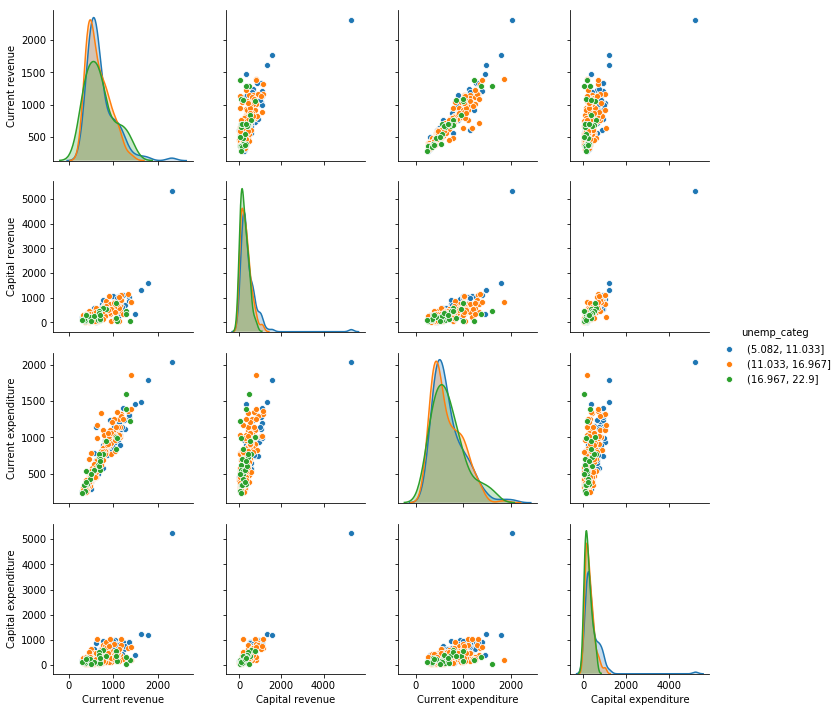

In [108]:
sns.pairplot(df.loc[:, fin_categ], hue="unemp_categ")

### Analysis of Age specific Features

These variables explain the demographic structure of a municipality.

In [109]:
demo_1 = ['Unemployment_Rate', 'overall_0-14', 'overall_15-64',
       'overall_65 or more']
demo_1_categ = ['unemp_categ', 'overall_0-14', 'overall_15-64',
       'overall_65 or more']

In [110]:
demo_2 = ['Unemployment_Rate','Potential sustainability index', 'Ageing index', 'Population density',
       'migrants_Males', 'migrants_Females', 'Young-age dependency ratio',
       'enterprises density', 'labour productivity']
demo_2_categ = ['unemp_categ','Potential sustainability index', 'Ageing index', 'Population density',
       'migrants_Males', 'migrants_Females', 'Young-age dependency ratio',
       'enterprises density', 'labour productivity']

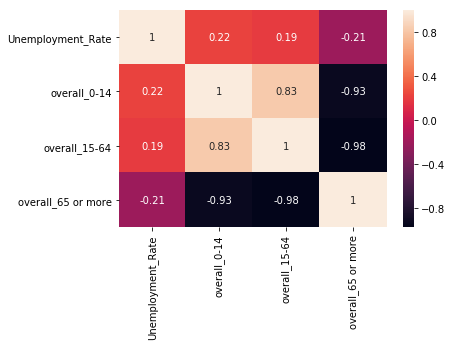

In [111]:
sns.heatmap(df.loc[:, demo_1].corr(), annot=True)

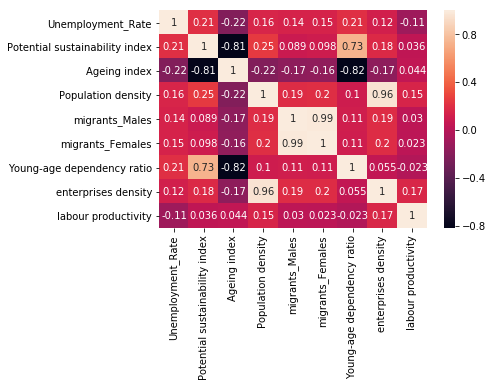

In [112]:
sns.heatmap(df.loc[:, demo_2].corr(), annot=True)

Interesting is, that enterprise density has a positive correlation to unemplyment rate. One might think it would be the other way around. Also there is a high magnitude in this feature. There might also be a lot of multicolinearity with population density involved.

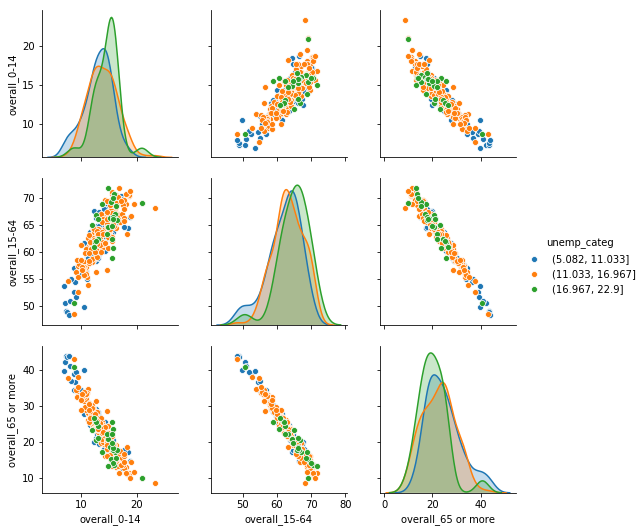

In [113]:
sns.pairplot(df.loc[:, demo_1_categ], hue="unemp_categ")

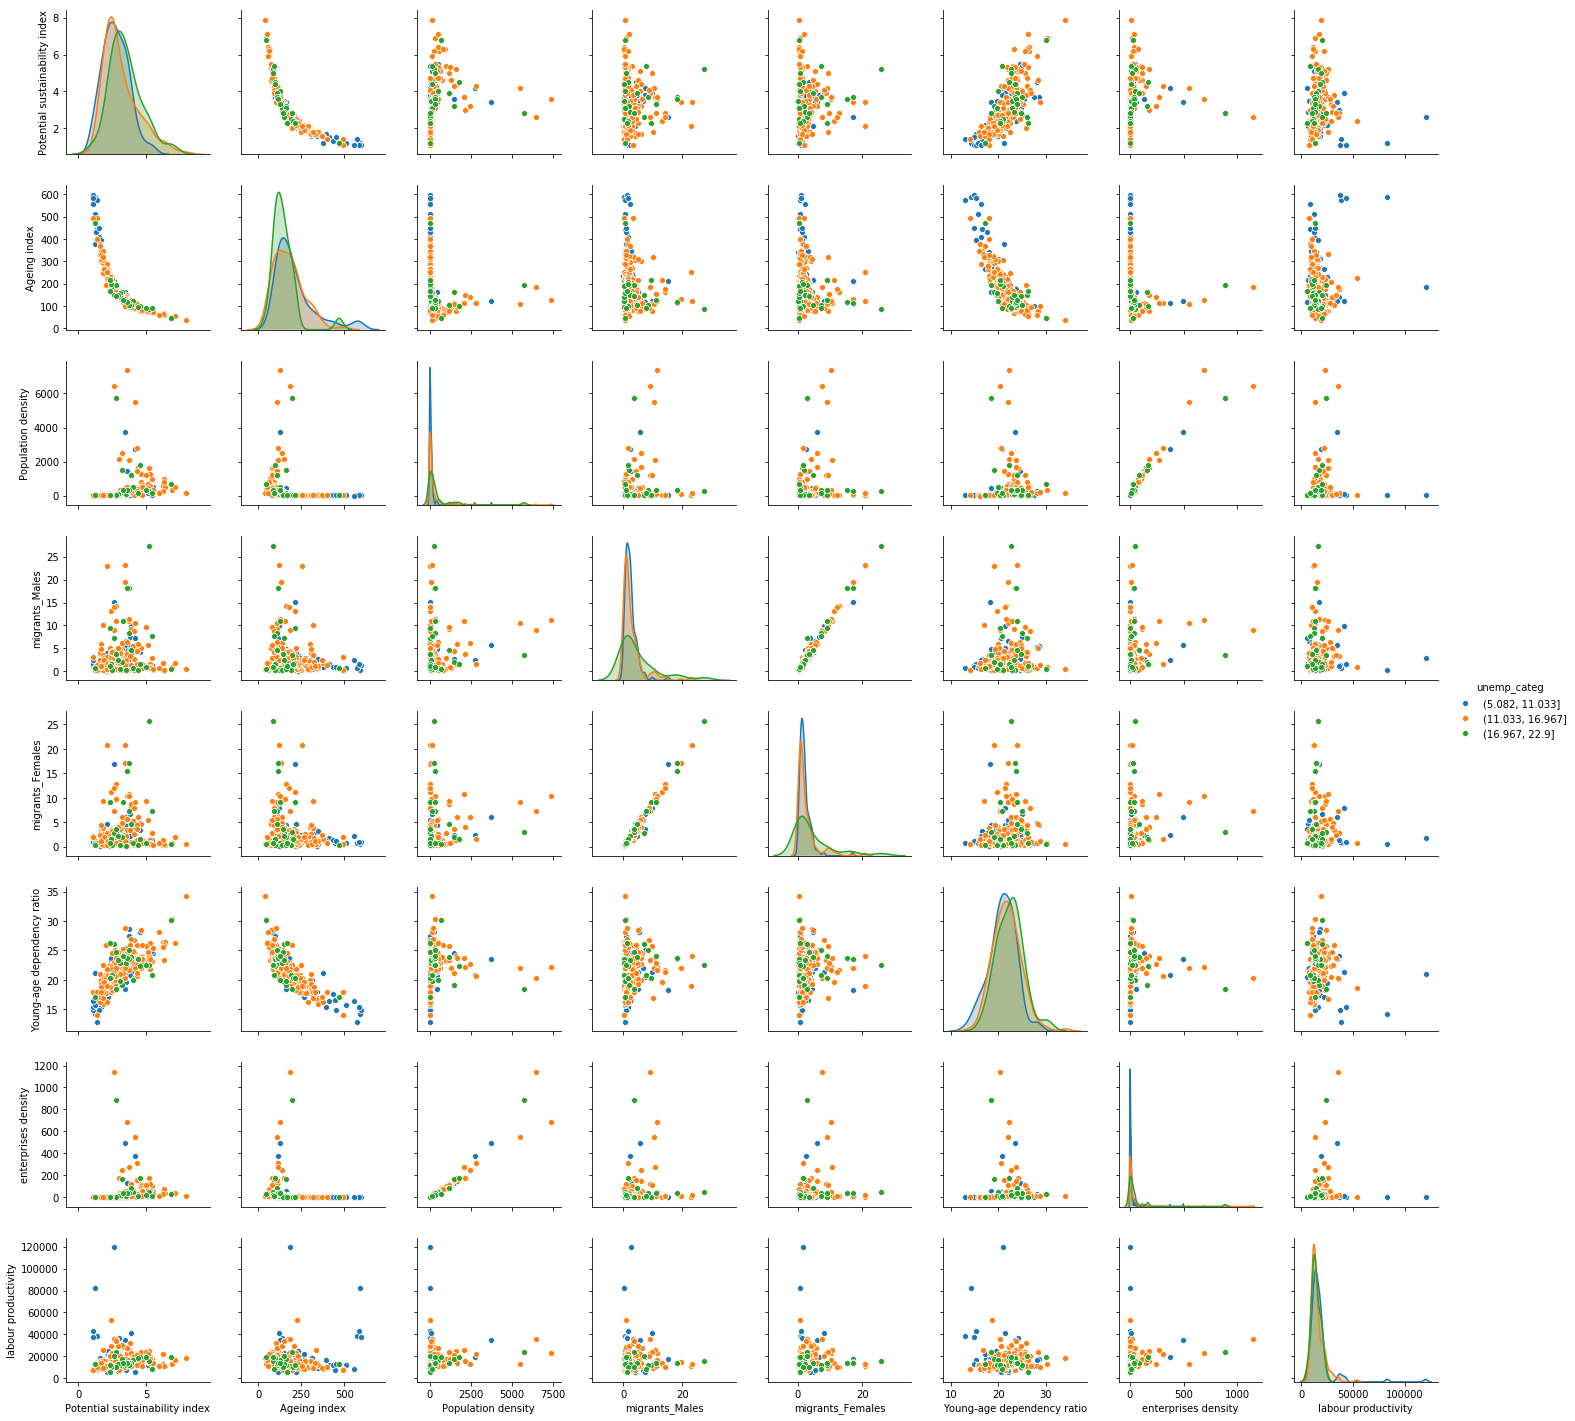

In [114]:
sns.pairplot(df.loc[:, demo_2_categ], hue="unemp_categ")

In [115]:
df.loc[:,demo_2].describe()

,Unemployment_Rate,Potential sustainability index,Ageing index,Population density,migrants_Males,migrants_Females,Young-age dependency ratio,enterprises density,labour productivity
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,12.387013,3.030195,188.331494,299.340909,3.046104,2.657468,21.528896,32.577273,16150.051948
std,2.950718,1.192279,100.689524,828.135292,3.728902,3.404028,2.965300,106.823062,9462.612133
min,5.100000,1.100000,36.800000,5.100000,0.100000,0.100000,12.900000,0.500000,5318.400000
25%,10.100000,2.200000,119.575000,28.050000,0.975000,0.800000,19.500000,2.675000,11708.450000
50%,12.100000,2.750000,169.950000,71.850000,1.900000,1.550000,21.400000,6.450000,13877.400000
75%,14.300000,3.625000,223.700000,178.875000,3.625000,3.125000,23.400000,17.225000,18200.325000
max,22.900000,7.900000,597.800000,7363.400000,27.400000,25.700000,34.200000,1143.400000,119614.500000


In [116]:
df.loc[df["Population density"]>5000,demo_2]

,Unemployment_Rate,Potential sustainability index,Ageing index,Population density,migrants_Males,migrants_Females,Young-age dependency ratio,enterprises density,labour productivity
Municipality,,,,,,,,,
Porto,17.6,2.8,194.1,5736.1,3.6,3.0,18.4,888.0,23759.1
Amadora,15.0,3.6,126.4,7363.4,11.3,10.3,22.2,685.5,23247.5
Lisboa,11.8,2.6,185.8,6446.2,9.0,7.4,20.4,1143.4,35443.4
Odivelas,12.1,4.2,107.3,5484.3,10.6,9.2,22.1,546.2,13322.7


### Analysis of Election Results for each Municipality

These variables show the results of the 2011 parliament elections.

In [117]:
poli = ['Unemployment_Rate','BE', 'CDS-PP', 'PCP-PEV',
       'PPD/PSD', 'PS']
poli_categ = ['unemp_categ','BE', 'CDS-PP', 'PCP-PEV',
       'PPD/PSD', 'PS']

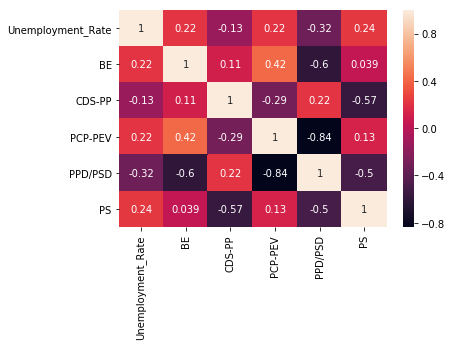

In [118]:
sns.heatmap(df.loc[:, poli].corr(), annot=True)

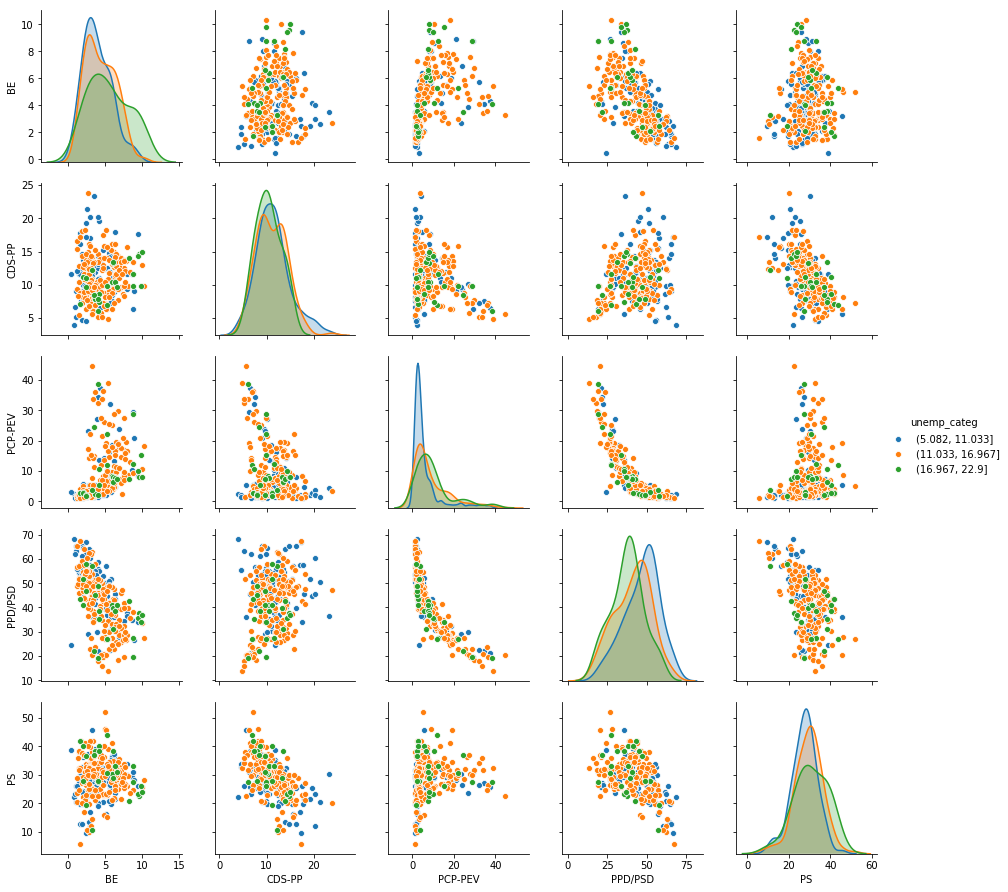

In [119]:
sns.pairplot(df.loc[:, poli_categ], hue="unemp_categ")